<a href="https://colab.research.google.com/github/abhaymittal2001/Assignments/blob/main/Ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic libraries
import os
import numpy as np
import copy
import random
import matplotlib.pyplot as plt


#Framework
import torch
import torchvision

#data and its management related libraries
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
import torchvision.transforms as transforms
from PIL import Image #python imaging library
import cv2


#for creating neural networks
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF

#for optimising neural networks
import torch.optim as optim

#for metrics and analysis
import sklearn
from torchsummary import summary

torch.__version__

'2.1.0+cu121'

In [ ]:
#Importing the California Housing Dataset
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

#Printing the first five rows of the dataset
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


###Scratch Adam Implementation

In [ ]:
class Adam_Optimizer_Update:
    def __init__(self, prameters, learnrate=0.0001, sigma1=0.9, sigma2=0.999, epsilon_val=1e-6):
        self.prameters = list(prameters)
        self.sigma2 = sigma2
        self.learnrate = learnrate
        self.sigma1 = sigma1
        self.epsilon_val = epsilon_val
        self.first_moment = [torch.zeros_like(p) for p in self.prameters]
        self.second_moment = [torch.zeros_like(p) for p in self.prameters]
        self.iteration_counter = 0

    def update_params(self):
        self.iteration_counter += 1
        for idx, param in enumerate(self.prameters):
            if param.grad is None:
                continue

            grad = param.grad.data
            self.first_moment[idx] = self.sigma1 * self.first_moment[idx] + (1 - self.sigma1) * grad
            self.second_moment[idx] = self.sigma2 * self.second_moment[idx] + (1 - self.sigma2) * (grad ** 2)

            # Correct bias for the first moment and the second moment
            corrected_first = self.first_moment[idx] / (1 - self.sigma1 ** self.iteration_counter)
            corrected_second = self.second_moment[idx] / (1 - self.sigma2 ** self.iteration_counter)

            # Update the parameters
            param.data -= self.learnrate * corrected_first / (torch.sqrt(corrected_second) + self.epsilon_val)

    def reset_gradients(self):
        for param in self.prameters:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()

Fetching the dataset and converting to tensors with train-test split

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Fetch the dataset
california_housing = fetch_california_housing(as_frame=True)
X, y = california_housing.data, california_housing.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)  # Unsqueezed to make it a column vector

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


###Creating Neural Network Model

In [ ]:
class california_reg(nn.Module):
    def __init__(self):
        super(california_reg, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(8, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
        )

    def forward(self, x):
        return self.layers(x)  # Direct model output

# Initialize the model
neuralmodel = california_reg()

# Initialize the Adam optimizer from torch.optim (recommended)
optimizer = torch.optim.Adam(neuralmodel.parameters(), lr=0.0001)



In [ ]:
for name, param in Linear_Model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

seq_container.0.weight tensor([[ 0.3411, -0.2900, -0.1664,  ..., -0.2101, -0.0729, -0.2785],
        [-0.3402,  0.1232,  0.3136,  ...,  0.1054, -0.3216,  0.0320],
        [-0.1999, -0.0284, -0.0925,  ..., -0.1934, -0.0758, -0.2475],
        ...,
        [ 0.2478,  0.0229, -0.1710,  ..., -0.2243,  0.2732,  0.0048],
        [ 0.1563, -0.1988,  0.2646,  ..., -0.2268, -0.3147, -0.1712],
        [ 0.1852,  0.2325,  0.0735,  ..., -0.2707,  0.1792,  0.2506]])
seq_container.0.bias tensor([-9.4052e-02,  2.6647e-01,  2.0199e-01,  1.6215e-01, -3.4117e-01,
         1.2450e-01, -5.1593e-02,  1.1018e-01,  1.4064e-01, -5.6166e-02,
         1.5118e-02,  7.5599e-02,  2.4705e-01,  2.2424e-01,  3.4388e-01,
         3.3091e-01, -4.0582e-02,  2.4921e-01, -3.1333e-01,  2.3699e-01,
        -9.2474e-02,  2.9999e-01,  3.5041e-01, -3.2136e-01,  1.6955e-01,
        -1.6078e-01, -2.3953e-01,  3.3755e-01, -3.0452e-02,  2.2367e-01,
         1.5462e-03,  1.4850e-01, -2.1905e-02,  2.7676e-01,  1.5484e-01,
        -6.

Building Dataloader

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

Training and Testing

In [ ]:
import torch.optim as optim


optimizer = optim.Adam_Optimizer_Update(neuralmodel.parameters(), lr=0.0001)  # Adjust learning rate as needed

# Training loop
num_epochs = 100
epochs_count = []
train_losses = []
val_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()  # Clear gradients before each batch

        outputs_train = neuralmodel(X_batch_train)  # Forward pass
        loss = criterion(outputs_train, y_batch_train)  # Calculate loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update model parameters

    # Calculate and track validation loss (adjust based on your setup)
    with torch.no_grad():
        val_loss_sum = 0
        for X_batch_val, y_batch_val in val_loader:
            outputs_val = neuralmodel(X_batch_val)
            val_loss = criterion(outputs_val, y_batch_val)
            val_loss_sum += val_loss.item()
        val_loss = val_loss_sum / len(val_loader)
        val_losses.append(val_loss)

    # Print and track training loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')
    train_losses.append(loss.item())

# ... (use train_losses and val_losses for plotting or analysis)


Epoch [1/100], Train Loss: 0.9051177501678467
Epoch [1/100], Test Loss: 0.9971380829811096
Epoch [11/100], Train Loss: 0.27641457319259644
Epoch [11/100], Test Loss: 0.3770340085029602
Epoch [21/100], Train Loss: 0.27802732586860657
Epoch [21/100], Test Loss: 0.19764414429664612
Epoch [31/100], Train Loss: 0.25545287132263184
Epoch [31/100], Test Loss: 0.24673105776309967
Epoch [41/100], Train Loss: 0.2968901991844177
Epoch [41/100], Test Loss: 0.2969544231891632
Epoch [51/100], Train Loss: 0.13887356221675873
Epoch [51/100], Test Loss: 0.2858010530471802
Epoch [61/100], Train Loss: 0.06699711084365845
Epoch [61/100], Test Loss: 0.5987846851348877
Epoch [71/100], Train Loss: 0.28085583448410034
Epoch [71/100], Test Loss: 0.19580984115600586
Epoch [81/100], Train Loss: 0.24788103997707367
Epoch [81/100], Test Loss: 0.26946505904197693
Epoch [91/100], Train Loss: 0.36436954140663147
Epoch [91/100], Test Loss: 0.19692452251911163


In [ ]:
print(len(epochs_count), len(train_running_losses))

10 10


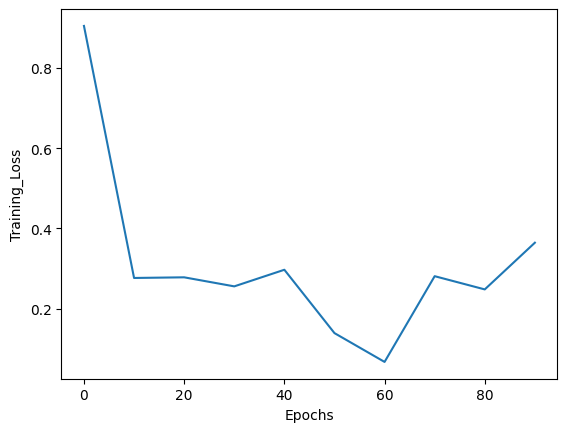

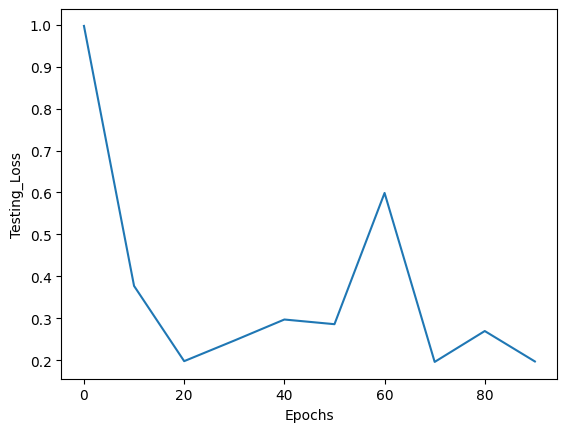

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

## 3. Nesterov optim

In [ ]:
class nesterov_optimiser:
    def __init__(self, params, learning_rate=0.0001, momentum=0.9):
        self.params = list(params)
        self.lr = learning_rate
        self.momentum = momentum
        self.velocity = [torch.zeros_like(p.data) for p in self.params]

    def update_params(self):
        for param, v in zip(self.params, self.velocity):
            if param.grad is not None:
                v_prev = v.clone()
                v.mul_(self.momentum).add_(param.grad, alpha=-self.lr)
                param.data.add_(v_prev.mul_(-self.momentum).add_(v, alpha=1 + self.momentum), alpha=-1)

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.detach_()
                param.grad.zero_()


In [ ]:

# Initialize the model
neuralmodel2= california_reg()

# Initialize the custom Adam optimizer
optimizer = NAGOptimizer(neuralmodel2.parameters(), learning_rate=0.0001)

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

optimizer = NAGOptimizer(Linear_Model.parameters(), learning_rate=0.0001, momentum=0.9)
criterion = torch.nn.MSELoss()

# Training loop
num_epochs = 100  # Or whatever number of epochs you deem appropriate
epochs_count = []
train_running_losses = []
test_running_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()

        outputs_train = Linear_Model(X_batch_train)    #computing outputs for the batch
        loss = criterion(outputs_train, y_batch_train) #computing loss for the batch

        loss.backward()        #computing gradients
        optimizer.update_params()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}')
        epochs_count.append(epoch)
        train_running_losses.append(loss.item())
    for X_batch_test, y_batch_test in test_loader:
        outputs_test = Linear_Model(X_batch_test)    #computing outputs for the batch
        loss_test = criterion(outputs_test, y_batch_test) #computing loss for the batch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {loss_test.item()}')
        test_running_losses.append(loss_test.item())

Epoch [1/100], Train Loss: 0.6246849298477173
Epoch [1/100], Test Loss: 0.8813686370849609
Epoch [11/100], Train Loss: 0.518366813659668
Epoch [11/100], Test Loss: 0.41500648856163025
Epoch [21/100], Train Loss: 0.28970953822135925
Epoch [21/100], Test Loss: 0.7643828392028809
Epoch [31/100], Train Loss: 0.251670241355896
Epoch [31/100], Test Loss: 0.3188621699810028
Epoch [41/100], Train Loss: 0.15182872116565704
Epoch [41/100], Test Loss: 0.3549387753009796
Epoch [51/100], Train Loss: 0.18210023641586304
Epoch [51/100], Test Loss: 0.22065696120262146
Epoch [61/100], Train Loss: 0.25258535146713257
Epoch [61/100], Test Loss: 0.14565205574035645
Epoch [71/100], Train Loss: 0.34681937098503113
Epoch [71/100], Test Loss: 0.1748136430978775
Epoch [81/100], Train Loss: 0.28644606471061707
Epoch [81/100], Test Loss: 0.41621512174606323
Epoch [91/100], Train Loss: 0.34227633476257324
Epoch [91/100], Test Loss: 0.3549961745738983


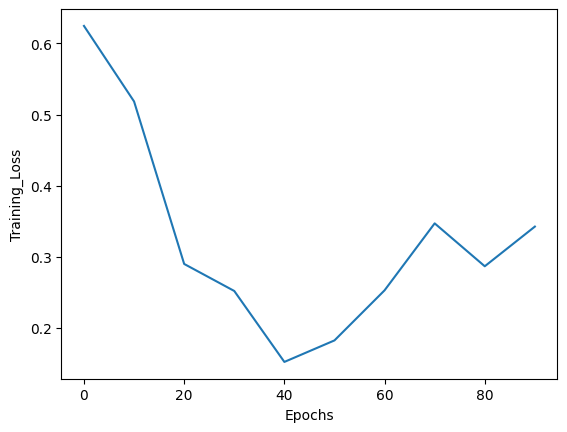

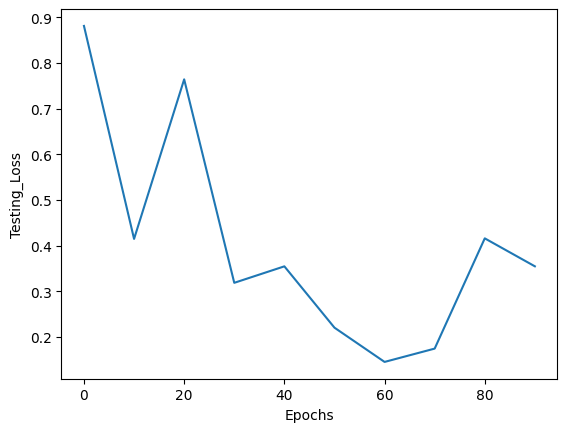

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

[link text] torch.optim optimizers

4.1 torch.optim.Adam

In [ ]:

# Initialize the model
neuralmodel3 = california_reg()
# Initialize the custom Adam optimizer
optimizer = torch.optim.Adam(neuralmodel3.parameters(), lr=0.0001 , eps = 1e-6)

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 100  # Or whatever number of epochs you deem appropriate
epochs_count = []
train_running_losses = []
test_running_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()

        outputs_train = Linear_Model(X_batch_train)    #computing outputs for the batch
        loss = criterion(outputs_train, y_batch_train) #computing loss for the batch

        loss.backward()        #computing gradients
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}')
        epochs_count.append(epoch)
        train_running_losses.append(loss.item())
    for X_batch_test, y_batch_test in test_loader:
        outputs_test = Linear_Model(X_batch_test)    #computing outputs for the batch
        loss_test = criterion(outputs_test, y_batch_test) #computing loss for the batch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {loss_test.item()}')
        test_running_losses.append(loss_test.item())

Epoch [1/100], Train Loss: 0.8973640203475952
Epoch [1/100], Test Loss: 0.9665755033493042
Epoch [11/100], Train Loss: 0.36597567796707153
Epoch [11/100], Test Loss: 0.5159504413604736
Epoch [21/100], Train Loss: 0.29451480507850647
Epoch [21/100], Test Loss: 0.1864139288663864
Epoch [31/100], Train Loss: 0.13864165544509888
Epoch [31/100], Test Loss: 0.5741347670555115
Epoch [41/100], Train Loss: 0.2518140971660614
Epoch [41/100], Test Loss: 0.21418872475624084
Epoch [51/100], Train Loss: 0.15456639230251312
Epoch [51/100], Test Loss: 0.17184752225875854
Epoch [61/100], Train Loss: 0.4858338534832001
Epoch [61/100], Test Loss: 0.23256199061870575
Epoch [71/100], Train Loss: 0.28188878297805786
Epoch [71/100], Test Loss: 0.4003734290599823
Epoch [81/100], Train Loss: 0.15817898511886597
Epoch [81/100], Test Loss: 0.2752433717250824
Epoch [91/100], Train Loss: 0.3238295614719391
Epoch [91/100], Test Loss: 0.12850011885166168


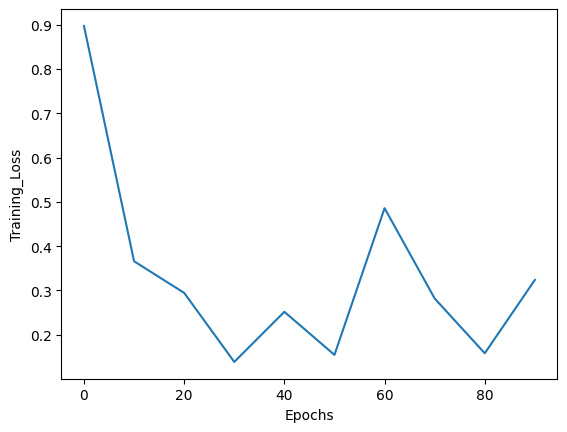

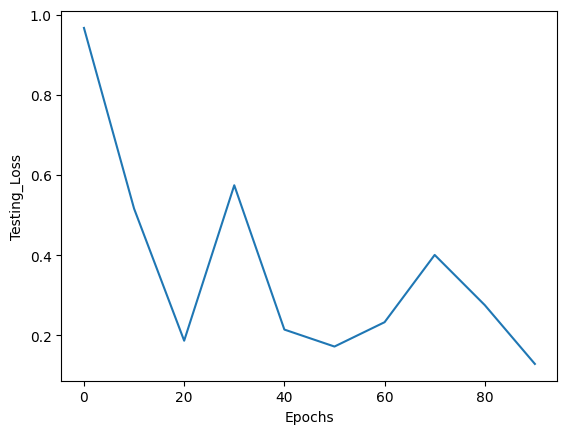

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

4.2 torch.optim.SGD with momentum (i.e. NAG)

In [ ]:

neuralmodel4= california_reg()

# Initialize the custom Adam optimizer
optimizer = torch.optim.SGD(neuralmodel4.parameters(), lr=0.0001,momentum=0.9, nesterov=True)

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 100  # Or whatever number of epochs you deem appropriate
epochs_count = []
train_running_losses = []
test_running_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()

        outputs_train = Linear_Model(X_batch_train)    #computing outputs for the batch
        loss = criterion(outputs_train, y_batch_train) #computing loss for the batch

        loss.backward()        #computing gradients
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}')
        epochs_count.append(epoch)
        train_running_losses.append(loss.item())
    for X_batch_test, y_batch_test in test_loader:
        outputs_test = Linear_Model(X_batch_test)    #computing outputs for the batch
        loss_test = criterion(outputs_test, y_batch_test) #computing loss for the batch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {loss_test.item()}')
        test_running_losses.append(loss_test.item())

Epoch [1/100], Train Loss: 0.9426189064979553
Epoch [1/100], Test Loss: 0.4935791790485382
Epoch [11/100], Train Loss: 0.5258710980415344
Epoch [11/100], Test Loss: 0.7330377697944641
Epoch [21/100], Train Loss: 0.222578227519989
Epoch [21/100], Test Loss: 0.5210801362991333
Epoch [31/100], Train Loss: 0.3091698884963989
Epoch [31/100], Test Loss: 0.31772416830062866
Epoch [41/100], Train Loss: 0.13121387362480164
Epoch [41/100], Test Loss: 0.301408052444458
Epoch [51/100], Train Loss: 0.5062567591667175
Epoch [51/100], Test Loss: 0.19694460928440094
Epoch [61/100], Train Loss: 0.566596508026123
Epoch [61/100], Test Loss: 0.17092236876487732
Epoch [71/100], Train Loss: 0.37561365962028503
Epoch [71/100], Test Loss: 0.1432240605354309
Epoch [81/100], Train Loss: 0.1966506689786911
Epoch [81/100], Test Loss: 0.36688050627708435
Epoch [91/100], Train Loss: 0.6204996705055237
Epoch [91/100], Test Loss: 0.29909977316856384


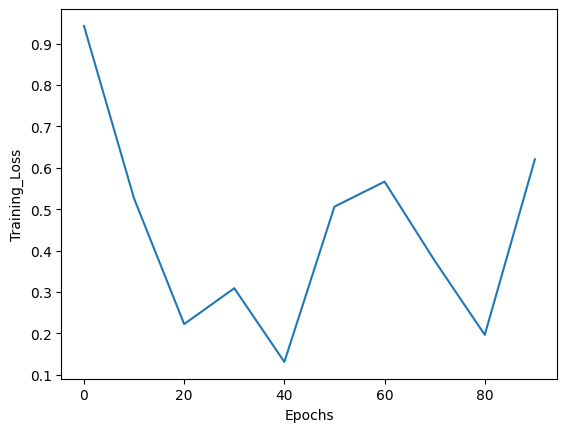

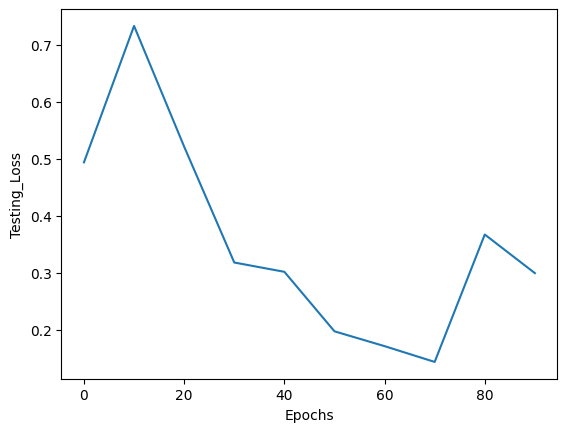

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

4.3 torch.optim.Adagrad

In [ ]:
neuralmodel4 = california_reg()

# Initialize the custom Adam optimizer
optimizer = torch.optim.Adagrad(neuralmodel4.parameters(), lr=0.0001)

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 100  # Or whatever number of epochs you deem appropriate
epochs_count = []
train_running_losses = []
test_running_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()

        outputs_train = neural_model4(X_batch_train)    #computing outputs for the batch
        loss = criterion(outputs_train, y_batch_train) #computing loss for the batch

        loss.backward()        #computing gradients
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}')
        epochs_count.append(epoch)
        train_running_losses.append(loss.item())
    for X_batch_test, y_batch_test in test_loader:
        outputs_test = neural_model4(X_batch_test)    #computing outputs for the batch
        loss_test = criterion(outputs_test, y_batch_test) #computing loss for the batch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {loss_test.item()}')
        test_running_losses.append(loss_test.item())

Epoch [1/100], Train Loss: 4.942672252655029
Epoch [1/100], Test Loss: 5.520859718322754
Epoch [11/100], Train Loss: 2.5759243965148926
Epoch [11/100], Test Loss: 2.9884018898010254
Epoch [21/100], Train Loss: 3.2190325260162354
Epoch [21/100], Test Loss: 2.55686354637146
Epoch [31/100], Train Loss: 1.9047435522079468
Epoch [31/100], Test Loss: 2.6897051334381104
Epoch [41/100], Train Loss: 0.9631990194320679
Epoch [41/100], Test Loss: 1.6024284362792969
Epoch [51/100], Train Loss: 0.9312567114830017
Epoch [51/100], Test Loss: 0.946694552898407
Epoch [61/100], Train Loss: 0.6516680717468262
Epoch [61/100], Test Loss: 0.9539167881011963
Epoch [71/100], Train Loss: 0.8590285778045654
Epoch [71/100], Test Loss: 0.43472981452941895
Epoch [81/100], Train Loss: 1.1677024364471436
Epoch [81/100], Test Loss: 0.9252827167510986
Epoch [91/100], Train Loss: 1.2961006164550781
Epoch [91/100], Test Loss: 0.9702000021934509


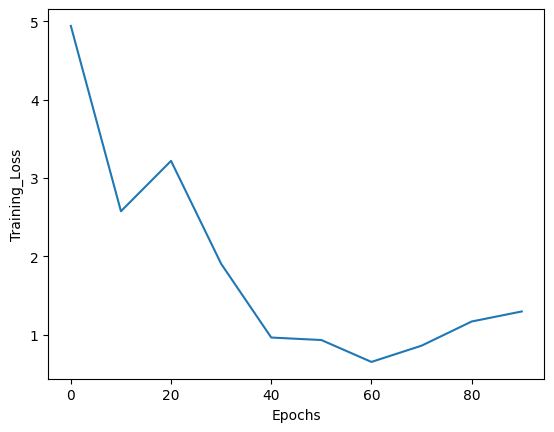

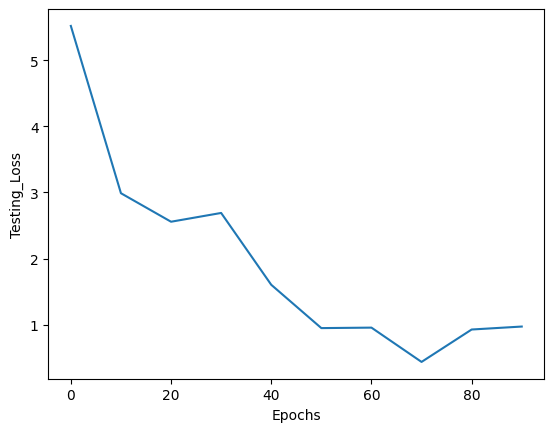

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

4.4 torch.optim.Adamax

In [ ]:
neuralmodel5 = california_reg()

# Initialize the custom Adam optimizer
optimizer = torch.optim.Adagrad(neuralmodel5.parameters(), lr=0.0001)

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 100  # Or whatever number of epochs you deem appropriate
epochs_count = []
train_running_losses = []
test_running_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()

        outputs_train = neuralmodel5(X_batch_train)    #computing outputs for the batch
        loss = criterion(outputs_train, y_batch_train) #computing loss for the batch

        loss.backward()        #computing gradients
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}')
        epochs_count.append(epoch)
        train_running_losses.append(loss.item())
    for X_batch_test, y_batch_test in test_loader:
        outputs_test = neuralmodel5(X_batch_test)    #computing outputs for the batch
        loss_test = criterion(outputs_test, y_batch_test) #computing loss for the batch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {loss_test.item()}')
        test_running_losses.append(loss_test.item())

Epoch [1/100], Train Loss: 3.551162004470825
Epoch [1/100], Test Loss: 2.2223308086395264
Epoch [11/100], Train Loss: 0.8065323233604431
Epoch [11/100], Test Loss: 0.6650188565254211
Epoch [21/100], Train Loss: 0.3291786015033722
Epoch [21/100], Test Loss: 0.3445892035961151
Epoch [31/100], Train Loss: 0.3882277011871338
Epoch [31/100], Test Loss: 0.35126686096191406
Epoch [41/100], Train Loss: 0.2507057189941406
Epoch [41/100], Test Loss: 0.2967046797275543
Epoch [51/100], Train Loss: 0.7077088952064514
Epoch [51/100], Test Loss: 0.29104530811309814
Epoch [61/100], Train Loss: 0.3837401866912842
Epoch [61/100], Test Loss: 0.39306265115737915
Epoch [71/100], Train Loss: 0.2058165818452835
Epoch [71/100], Test Loss: 0.7508907318115234
Epoch [81/100], Train Loss: 0.20625297725200653
Epoch [81/100], Test Loss: 0.44692257046699524
Epoch [91/100], Train Loss: 0.5226191282272339
Epoch [91/100], Test Loss: 1.0502511262893677


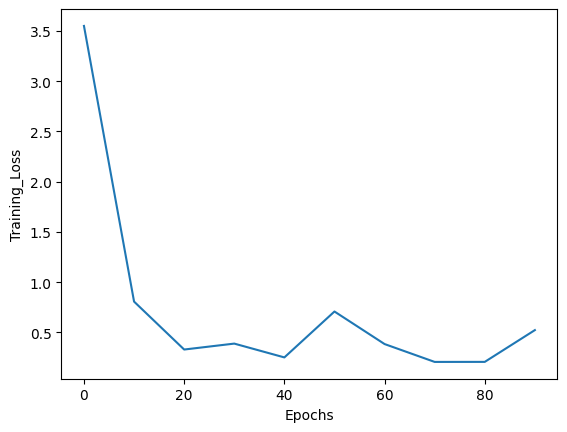

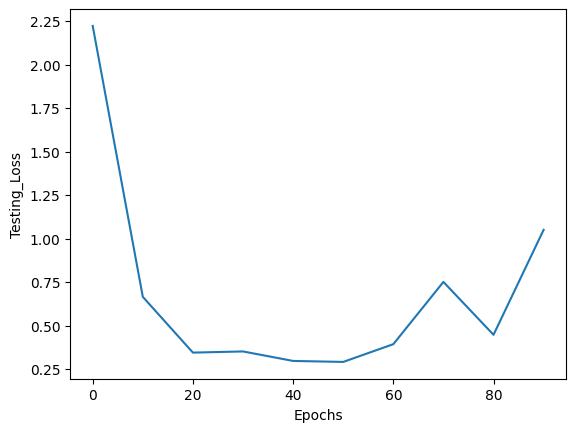

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

4.5 torch.optim.Adadelta

In [ ]:
neuralmodel6 = california_reg()

# Initialize the custom Adam optimizer
optimizer = torch.optim.Adadelta(neuralmodel6.parameters(), lr=0.0001)

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 100  # Or whatever number of epochs you deem appropriate
epochs_count = []
train_running_losses = []
test_running_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()

        outputs_train = Linear_Model(X_batch_train)    #computing outputs for the batch
        loss = criterion(outputs_train, y_batch_train) #computing loss for the batch

        loss.backward()        #computing gradients
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}')
        epochs_count.append(epoch)
        train_running_losses.append(loss.item())
    for X_batch_test, y_batch_test in test_loader:
        outputs_test = neuralmodel6(X_batch_test)    #computing outputs for the batch
        loss_test = criterion(outputs_test, y_batch_test) #computing loss for the batch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {loss_test.item()}')
        test_running_losses.append(loss_test.item())

Epoch [1/100], Train Loss: 5.821742057800293
Epoch [1/100], Test Loss: 3.4731698036193848
Epoch [11/100], Train Loss: 5.771300792694092
Epoch [11/100], Test Loss: 6.181864261627197
Epoch [21/100], Train Loss: 3.5472230911254883
Epoch [21/100], Test Loss: 4.899715900421143
Epoch [31/100], Train Loss: 5.095395088195801
Epoch [31/100], Test Loss: 2.8710639476776123
Epoch [41/100], Train Loss: 3.312716007232666
Epoch [41/100], Test Loss: 3.199258804321289
Epoch [51/100], Train Loss: 3.2498958110809326
Epoch [51/100], Test Loss: 3.2292044162750244
Epoch [61/100], Train Loss: 2.359405994415283
Epoch [61/100], Test Loss: 1.6417704820632935
Epoch [71/100], Train Loss: 1.606836199760437
Epoch [71/100], Test Loss: 2.214171886444092
Epoch [81/100], Train Loss: 1.28317391872406
Epoch [81/100], Test Loss: 1.9557416439056396
Epoch [91/100], Train Loss: 1.9019596576690674
Epoch [91/100], Test Loss: 2.0265631675720215


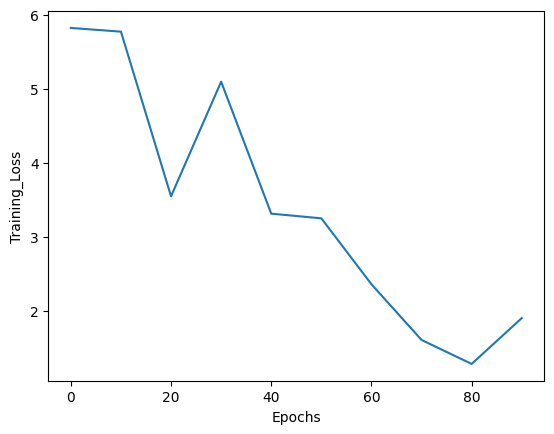

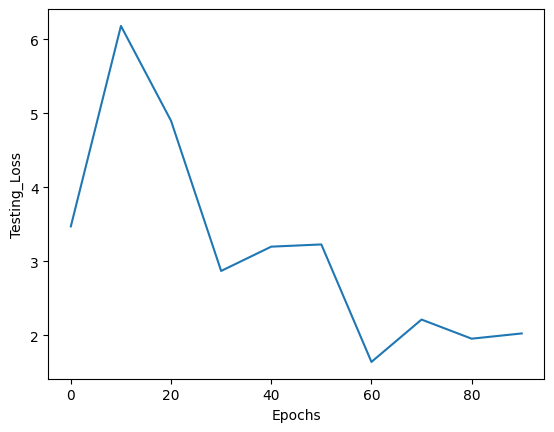

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

4.6 torch.optim.SGD with Mini-Batch (i.e. Vanilla Gradient Descent)

In [ ]:
neuralmodel7 = california_reg()

# Initialize the custom Adam optimizer
optimizer = torch.optim.SGD(neuralmodel7.parameters(), lr=0.0001)

In [ ]:
#Building dataloader
from torch.utils.data import DataLoader, TensorDataset
criterion = torch.nn.MSELoss()

# Assuming X_train, y_train have been defined and preprocessed as shown previously
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 100  # Or whatever number of epochs you deem appropriate
epochs_count = []
train_running_losses = []
test_running_losses = []
for epoch in range(num_epochs):
    for X_batch_train, y_batch_train in train_loader:
        optimizer.zero_grad()

        outputs_train = neuralmodel7(X_batch_train)    #computing outputs for the batch
        loss = criterion(outputs_train, y_batch_train) #computing loss for the batch

        loss.backward()        #computing gradients
        optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}')
        epochs_count.append(epoch)
        train_running_losses.append(loss.item())
    for X_batch_test, y_batch_test in test_loader:
        outputs_test = neuralmodel7(X_batch_test)    #computing outputs for the batch
        loss_test = criterion(outputs_test, y_batch_test) #computing loss for the batch
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {loss_test.item()}')
        test_running_losses.append(loss_test.item())

Epoch [1/100], Train Loss: 3.959913730621338
Epoch [1/100], Test Loss: 3.3591880798339844
Epoch [11/100], Train Loss: 0.6488233208656311
Epoch [11/100], Test Loss: 0.5440900325775146
Epoch [21/100], Train Loss: 0.3914431035518646
Epoch [21/100], Test Loss: 0.8070306777954102
Epoch [31/100], Train Loss: 0.7442648410797119
Epoch [31/100], Test Loss: 1.2527539730072021
Epoch [41/100], Train Loss: 0.4712371826171875
Epoch [41/100], Test Loss: 0.6053298115730286
Epoch [51/100], Train Loss: 0.40613019466400146
Epoch [51/100], Test Loss: 0.8376435041427612
Epoch [61/100], Train Loss: 0.8076922297477722
Epoch [61/100], Test Loss: 0.6927210092544556
Epoch [71/100], Train Loss: 0.4682212471961975
Epoch [71/100], Test Loss: 0.3279920220375061
Epoch [81/100], Train Loss: 0.2923002243041992
Epoch [81/100], Test Loss: 0.2777186632156372
Epoch [91/100], Train Loss: 0.31681323051452637
Epoch [91/100], Test Loss: 0.4881029427051544


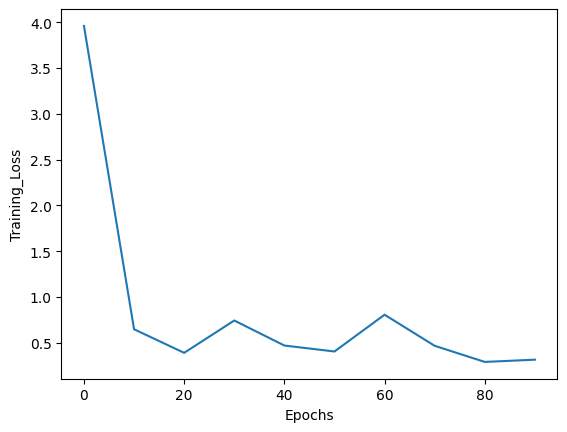

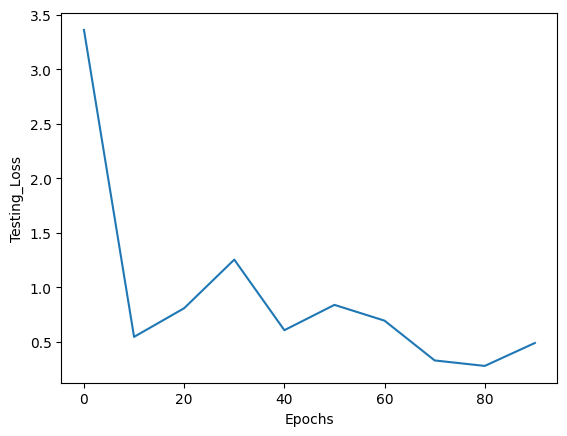

In [ ]:
#Plotting Training Loss and Test Loss vs Number of Epochs
#Have previously imported matplotlib as plt

figure1 = plt.plot(epochs_count, train_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Training_Loss')
plt.show()

figure2 = plt.plot(epochs_count, test_running_losses)
plt.xlabel('Epochs')
plt.ylabel('Testing_Loss')
plt.show()

###5.1 As far as synchronisation of the loss curves for scratch optimizer functions and in-built optimizer functions is concerned, although there are instabilities in the loss vs epoch curves as compared to the ideal behaviour of strictly-deacreasing for both of them, the extent of these instabilities itself vary between the scratch and in-bult optimizers.
###5.2 One of the main reasons for this variation can be the difference in initialization of the model parameters. If the parameters are initialised differently in the custom implementation compared to the in-built optimizer, it can lead to different convergence behaviour.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html